In [47]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from collections import defaultdict
from itertools import combinations
from collections import deque, defaultdict
from itertools import chain
from itertools import islice
import time
import matplotlib.pyplot as plt
import heapq
from operator import itemgetter
from contextlib import suppress

In [98]:
df = pd.read_csv("vk.csv", delimiter=',')

In [73]:
df_test = pd.read_csv("test.txt", delimiter='\t')

FileNotFoundError: [Errno 2] No such file or directory: 'test.txt'

In [74]:
df_astro = pd.read_csv("astro.txt", delimiter='\t')
print(type(df_astro))

<class 'pandas.core.frame.DataFrame'>


In [69]:
df_google = pd.read_csv("google.txt", delimiter='\t')

In [ ]:
df.head()
df.shape

## Число вершин

In [4]:
edges_astro = len(set([*df_astro["u"].unique(), *df_astro["v"].unique()]))
print(edges_astro)

18772


In [9]:
edges_google = len(set([*df_google["u"].unique(), *df_google["v"].unique()]))
print(edges_google)

875713


In [10]:
edges_vk = len(set([*df["u"].unique(), *df["v"].unique()]))
print(edges_vk)

KeyError: 'u'

## Число всех ребер

In [51]:
print(f'Число ребер в графе: {len(df["u"])}')

Число ребер в графе: 14847753


In [43]:
print(f'Теоретически возможное число ребер в данном графе: {edges_astro*(edges_astro-1)/2}')

Теоретически возможное число ребер в данном графе: 176184606.0


In [53]:
print(f'Теоретически возможное число ребер в данном графе: {edges_google*(edges_google-1)/2}')

Теоретически возможное число ребер в данном графе: 383436191328.0


In [54]:
print(f'Теоретически возможное число ребер в данном графе: {edges_vk*(edges_vk-1)/2}')

Теоретически возможное число ребер в данном графе: 4816329420378.0


## Число уникальных ребер

In [15]:
# unique_edges = len(np.unique(df[['u', 'v', 't', 'h']].values, axis=0))
unique_edges = np.unique(df[['u', 'v']].values, axis=0)
print(f'Число уникальных ребер: {len(unique_edges)}')

Число уникальных ребер: 14847753


## Плотность графа
Для неориентированного простого графа плотность графа с числом вершин V  определяется как отношение числа его рёбер E к числу рёбер полного графа

In [16]:
density_astro = 2*len()/((vertices*(vertices-1)))
print(f'Плотность: {density}')

Плотность: 3.0827943240715257e-06


In [ ]:
density_astro = 2*len(unique_edges)/((vertices*(vertices-1)))
print(f'Плотность: {density}')

In [ ]:
density_astro = 2*len(unique_edges)/((vertices*(vertices-1)))
print(f'Плотность: {density}')

## Компоненты слабой связности

In [6]:
class Node:
    def __init__(self, key):
        self.key = key
        self.parent = self
        self.size = 1

class UnionFind(dict):
    def find(self, key):
        node = self.get(key, None)
        if node is None:
            node = self[key] = Node(key)
        else:
            while node.parent != node: 
                # walk up & perform path compression
                node.parent, node = node.parent.parent, node.parent
        return node

    def union(self, key_a, key_b):
        node_a = self.find(key_a)
        node_b = self.find(key_b)
        if node_a != node_b:  # disjoint? -> join!
            if node_a.size < node_b.size:
                node_a.parent = node_b
                node_b.size += node_a.size
            else:
                node_b.parent = node_a
                node_a.size += node_b.size

In [7]:
def find_components(line_iterator):
    forest = UnionFind()

    for line in line_iterator:
        forest.union(line[0], line[1])

    result = defaultdict(list)
    for key in forest.keys():
        root = forest.find(key)
        result[root.key].append(key)

    return list(result.values())

In [61]:
graph_edges_vk = [edge for edge in df[["u","v"]].values]

In [62]:
start_time = time.time()
graph_components_vk = find_components(graph_edges_vk)
print(f"--- {(time.time() - start_time)} seconds ---")

--- 40.95025897026062 seconds ---


In [63]:
print(len(graph_components_vk))

28175


In [27]:
# nodes_test = set([*df_test["u"].unique(), *df_test["v"].unique()])
graph_edges_test = [edge for edge in df_test.values]
print(graph_edges_test)
start_time = time.time()
graph_components_test = find_components(graph_edges_test)
print(f"--- {(time.time() - start_time)} seconds ---")
print(graph_components_test)
print(len(graph_components_test))

[array([1, 2]), array([2, 3]), array([3, 1]), array([1, 4]), array([4, 5]), array([5, 1]), array([5, 6]), array([6, 7]), array([7, 8]), array([10, 11]), array([11, 13]), array([13, 10]), array([68, 19]), array([999,   9])]
--- 0.00013017654418945312 seconds ---
[[1, 2, 3, 4, 5, 6, 7, 8], [10, 11, 13], [68, 19], [999, 9]]
4


In [8]:
df_astro = pd.read_csv("astro.txt", delimiter='\t')
nodes_astro = set([*df_astro["u"].unique(), *df_astro["v"].unique()])
graph_edges_astro = [edge for edge in df_astro.values]
# print(graph_edges_astro)
start_time = time.time()
graph_components_astro = find_components(graph_edges_astro)
print(f"--- {(time.time() - start_time)} seconds ---")
print(len(graph_components_astro))

--- 0.23380708694458008 seconds ---
290


In [66]:
# df_google = pd.read_csv("google.txt", delimiter='\t')
nodes_google = set([*df_google["u"].unique(), *df_google["v"].unique()])
graph_edges_google = [edge for edge in df_google.values]
# print(graph_edges_google)
start_time = time.time()
graph_components_google = find_components(graph_edges_google)
print(f"--- {(time.time() - start_time)} seconds ---")
print(graph_components_google)

KeyboardInterrupt: 

In [ ]:
# df_google = pd.read_csv("google.txt", delimiter='\t')
nodes_vk = set([*df_vk["u"].unique(), *df_vk["v"].unique()])
graph_edges_vk = [edge for edge in df_vk.values]
# print(graph_edges_google)
start_time = time.time()
graph_components_vk = find_components(graph_edges_vk)
print(f"--- {(time.time() - start_time)} seconds ---")
print(len(graph_components_vk))

In [71]:
print(f'Число компонент слабой связности: {len(graph_components_test)}')

max_component_test = max(graph_components_test, key=lambda i: len(i))

print(f'Число вершин в максимальной компоненте связности: {len(max_component_test)}')
print(f'Доля вершин в максимальной по мощности компоненте слабой связности: {len(max_component_test)/len(nodes_test)}')

Число компонент слабой связности: 4
Число вершин в максимальной компоненте связности: 8


NameError: name 'nodes_test' is not defined

In [9]:
print(f'Число компонент слабой связности: {len(graph_components_astro)}')

max_component_astro = max(graph_components_astro, key=lambda i: len(i))

print(f'Число вершин в максимальной компоненте связности: {len(max_component_astro)}')
print(f'Доля вершин в максимальной по мощности компоненте слабой связности: {len(max_component_astro)/len(nodes_astro)}')

Число компонент слабой связности: 290
Число вершин в максимальной компоненте связности: 17903
Доля вершин в максимальной по мощности компоненте слабой связности: 0.9537076496910292


In [73]:
print(f'Число компонент слабой связности: {len(graph_components_google)}')

max_component_google = max(graph_components_google , key=lambda i: len(i))

print(f'Число вершин в максимальной компоненте связности: {len(max_component_google)}')
print(f'Доля вершин в максимальной по мощности компоненте слабой связности: {len(max_component_google)/len(nodes_google)}')

NameError: name 'graph_components_google' is not defined

In [79]:
print(f'Число компонент слабой связности: {len(graph_components_vk)}')

max_component_vk = max(graph_components_vk, key=lambda i: len(i))

print(f'Число вершин в максимальной компоненте связности: {len(max_component_vk)}')
print(f'Доля вершин в максимальной по мощности компоненте слабой связности: {len(max_component_vk)/vertices}')

Число компонент слабой связности: 28175
Число вершин в максимальной компоненте связности: 3041820
Доля вершин в максимальной по мощности компоненте слабой связности: 0.9800773475643056


## Радиус и диаметр наибольшей компоненты слабой связности

Эксцентриситет вершины - расстояние от нее до самой удаленной.  
Диаметр графа - максимальное расстояние между любыми двумя вершинами, то есть наибольший эксцентриситет.  
Радиус графа - наименьший эксцентриситет.

In [18]:
def binary_search(lys, val):
    first = 0
    last = len(lys)-1
    index = -1
    while (first <= last) and (index == -1):
        mid = (first+last)//2
        if lys[mid] == val:
            index = mid
        else:
            if val<lys[mid]:
                last = mid -1
            else:
                first = mid +1
    if index == -1:
        return False
    return index

test = [1,2,3,4]
if binary_search(test,7):
    print(1)

In [20]:
diameter = 0
radius = float("inf")

random_edges_max_component = []

i=0
for value in df.values[30000:]:
    if value[0] in max_component and value[1] in max_component:
#         print(i)
        i+=1
        diameter = max(diameter, value[3])
#         print(f"Diameter: {diameter}")
#         print(f"Radius: {radius}")
        radius = min(radius, value[3])
        if i==500:
            break

print(random_edges_max_component)

print(f"Diameter: {diameter}")
print(f"Radius: {radius}")

[]
Diameter: 9.0
Radius: 0.0


## Загрузка графов

In [33]:
def load_graph(path):
    print("Loading...{}".format(path))
    graph = {}  # graph : Dictionary = { node : { node1, node2, node3} }
    f = open(path, "r")
    i = 0
    while True:
        line = f.readline().strip(',')
        if line.startswith("#"):
            continue

        if not line:
            break
        
        node_from, node_to = map(int, line.split(',')[:2])

        # since graph is undirected
        if node_from not in graph:
            graph[node_from] = set()
        if node_to not in graph:
            graph[node_to] = set()

        graph[node_from].add(node_to)
        graph[node_to].add(node_from)

    return graph


def load_graph_by_whitespace(path):
    print("Loading...{}".format(path))
    graph = {}  # graph : Dictionary = { node : { node1, node2, node3} }
    f = open(path, "r")
    f.readline()
    while True:
        line = f.readline().strip()
        if not line:
            break
        if line.startswith("#"):
            continue
        node_from, node_to = map(int, line.split())

        # since graph is undirected
        if node_from not in graph:
            graph[node_from] = set()
        if node_to not in graph:
            graph[node_to] = set()

        graph[node_from].add(node_to)
        graph[node_to].add(node_from)

    return graph

def load_graph_by_whitespace_astro(path):
    print("Loading...{}".format(path))
    graph = {}  # graph : Dictionary = { node : { node1, node2, node3} }
    f = open(path, "r")
    f.readline()
    while True:
        line = f.readline().strip()
        if not line:
            break
        if line.startswith("#"):
            continue
        node_from, node_to = map(int, line.split())

        # since graph is undirected
        if node_from not in graph:
            graph[node_from] = []
        if node_to not in graph:
            graph[node_to] = []

        if node_from==node_to:
            graph[node_from].append(node_to)
        else:
            graph[node_from].append(node_to)
            graph[node_to].append(node_from)

    return graph


def load_graph_by_whitespace_vk(path):
    print("Loading...{}".format(path))
    graph = {}  # graph : Dictionary = { node : { node1, node2, node3} }
    f = open(path, "r")
    f.readline()
    while True:
        line = f.readline().strip(',')
        if not line:
            break
        if line.startswith("#"):
            continue
        node_from, node_to = map(int, line.split(',')[:2])

        # since graph is undirected
        if node_from not in graph:
            graph[node_from] = set()
        if node_to not in graph:
            graph[node_to] = set()

        graph[node_from].add(node_to)
        graph[node_to].add(node_from)

    return graph

In [119]:
start_time = time.time()
graph_nodes_degrees_vk = load_graph_by_whitespace_vk("/Users/antonkondrahin/FiniteGraphs/vk.csv")
# print(print_cliques(df_test[["u","v"]].values, 3, graph_nodes_degrees_test))
print(f"--- {(time.time() - start_time)} seconds ---")

Loading.../Users/antonkondrahin/FiniteGraphs/vk.csv
--- 28.84509801864624 seconds ---


In [94]:
start_time = time.time()
df_test = pd.read_csv("test.txt", delimiter='\t')
graph_nodes_degrees_test = load_graph_by_whitespace("/Users/antonkondrahin/PycharmProjects/FiniteGraphs/test.txt")
# print(print_cliques(df_test[["u","v"]].values, 3, graph_nodes_degrees_test))
print(f"--- {(time.time() - start_time)} seconds ---")

Loading.../Users/antonkondrahin/PycharmProjects/FiniteGraphs/test.txt
--- 0.0033769607543945312 seconds ---


In [34]:
start_time = time.time()
df_astro = pd.read_csv("astro.txt", delimiter='\t')
graph_nodes_degrees_astro = load_graph_by_whitespace_astro("/Users/antonkondrahin/FiniteGraphs/astro.txt")
# print_cliques(df_astro[["u","v"]].values, 3, graph_nodes_degrees_astro)
print(f"--- {(time.time() - start_time)} seconds ---")

Loading.../Users/antonkondrahin/FiniteGraphs/astro.txt
--- 0.30059814453125 seconds ---


In [52]:
start_time = time.time()
# graph_nodes_degrees_google = load_graph_by_whitespace("/Users/antonkondrahin/FiniteGraphs/google.txt")

graph_nodes_degrees_google = load_graph_by_whitespace_astro("/Users/antonkondrahin/FiniteGraphs/google.txt")

# print_cliques(df_astro[["u","v"]].values, 3, graph_nodes_degrees_astro)
print(f"--- {(time.time() - start_time)} seconds ---")

Loading.../Users/antonkondrahin/FiniteGraphs/google.txt
--- 3.332062005996704 seconds ---


## Локальный кластерный коэффициент вершины

### Число треугольников (клик размера 3)

In [35]:
def enumerate_all_cliques(G):
    """Returns all cliques in an undirected graph.

    This function returns an iterator over cliques, each of which is a
    list of nodes. The iteration is ordered by cardinality of the
    cliques: first all cliques of size one, then all cliques of size
    two, etc.

    Returns
    -------
    iterator
        An iterator over cliques, each of which is a list of nodes in
        `G`. The cliques are ordered according to size.

    Notes
    -----
    To obtain a list of all cliques, use
    `list(enumerate_all_cliques(G))`. However, be aware that in the
    worst-case, the length of this list can be exponential in the number
    of nodes in the graph (for example, when the graph is the complete
    graph). This function avoids storing all cliques in memory by only
    keeping current candidate node lists in memory during its search.
    """
#     print(f'G: {G}')
    index = {}
    nbrs = {}
    for node in G:
        index[node] = len(index)
        # Neighbors of u that appear after u in the iteration order of G.
        nbrs[node] = {v for v in G[node] if v not in index}
#     print(f'index: {index}\n')
#     print(f'nbrs: {nbrs}\n')
    queue = deque(([node], sorted(nbrs[node], key=index.get)) for node in G)
    # Loop invariants:
    # 1. len(base) is nondecreasing.
    # 2. (base + cnbrs) is sorted with respect to the iteration order of G.
    # 3. cnbrs is a set of common neighbors of nodes in base.
#     print(f'queue: {queue} \n')
    while queue:
#         print(f'queue.popleft(): {queue.popleft()}')
#         base, cnbrs = map(list, queue.popleft())
        base, cnbrs = queue.popleft()
        base, cnbrs = list(base), list(cnbrs)
#         print(f'base: {base} \n')
#         print(f'cnbrs: {cnbrs} \n')
        yield base
        for i, node in enumerate(cnbrs):
            # Use generators to reduce memory consumption.
            queue.append(
                (
                    chain(base, [node]),
                    filter(nbrs[node].__contains__, islice(cnbrs, i + 1, None)),
                )
            )
            
def count_k_cliques(G, k, vertice_clique):
    k_cliques_count = 0
    for clique in enumerate_all_cliques(G): 
        if len(clique) > k: 
            break
        elif len(clique) == k:
            for vertice in clique:
                vertice_clique[vertice].add(frozenset(clique))  # change to number of cliques
            k_cliques_count += 1
    return k_cliques_count, vertice_clique

In [98]:
start_time = time.time()
print(graph_nodes_degrees_test)
vertice_clique_test = defaultdict(set)
graph_cliques_number_test, graph_cliques_by_node_test = count_k_cliques(graph_nodes_degrees_test, 3, vertice_clique_test)
print(graph_cliques_number_test)
print(graph_cliques_by_node_test)
print(f"--- {(time.time() - start_time)} seconds ---")

{1: {2, 3, 4, 5}, 2: {1, 3}, 3: {1, 2}, 4: {1, 5}, 5: {1, 4, 6}, 6: {5, 7}, 7: {8, 6}, 8: {7}, 10: {11, 13}, 11: {10, 13}, 13: {10, 11}, 68: {19}, 19: {68}, 999: {9}, 9: {999}}
3
defaultdict(<class 'set'>, {1: {frozenset({1, 2, 3}), frozenset({1, 4, 5})}, 2: {frozenset({1, 2, 3})}, 3: {frozenset({1, 2, 3})}, 4: {frozenset({1, 4, 5})}, 5: {frozenset({1, 4, 5})}, 10: {frozenset({10, 11, 13})}, 11: {frozenset({10, 11, 13})}, 13: {frozenset({10, 11, 13})}})
--- 0.0007979869842529297 seconds ---


In [36]:
start_time = time.time()
vertice_clique = defaultdict(set)
graph_cliques_number, graph_cliques_by_node = count_k_cliques(graph_nodes_degrees_astro, 3, vertice_clique)
print(graph_cliques_number)
print(f"--- {(time.time() - start_time)} seconds ---")

1351441
--- 33.518789768218994 seconds ---


In [53]:
start_time = time.time()
vertice_clique = defaultdict(set)
graph_cliques_number, graph_cliques_by_node = count_k_cliques(graph_nodes_degrees_google, 3, vertice_clique)
print(graph_cliques_number)
print(f"--- {(time.time() - start_time)} seconds ---")

13391903
--- 929.2607760429382 seconds ---


In [218]:
start_time = time.time()
vertice_clique_vk = defaultdict(set)
graph_cliques_number_vk, graph_cliques_by_node_vk = count_k_cliques(graph_nodes_degrees_vk, 3, vertice_clique_vk)
print("---------------")
print(graph_cliques_number_vk)
# print(graph_cliques_by_node_test)
print(f"--- {(time.time() - start_time)} seconds ---")

NameError: name 'graph_nodes_degrees_vk' is not defined

### Локальные коэффициенты

Если кратко, то локальный коэффициент - это отношение числа треугольников, где есть искомая вершина, к степени вершины. Подробнее туть
https://translated.turbopages.org/proxy_u/en-ru.ru.7d7cd3c3-627e6c61-479fa8f8-74722d776562/https/en.wikipedia.org/wiki/Clustering_coefficient

In [30]:
start_time = time.time()
local_coeffs_test = defaultdict(int)
for node, cliques in graph_cliques_by_node_test.items():
    node_degree = len(graph_nodes_degrees_test.get(node, []))
    if node_degree>=2:
        local_coeffs_test[node] = 2*len(cliques)/(node_degree*(node_degree-1))
    else:
        local_coeffs_test[node] = 0
print(f"--- {(time.time() - start_time)} seconds ---")

--- 0.0001862049102783203 seconds ---


In [38]:
start_time = time.time()
local_coeffs = defaultdict(int)
for node, cliques in graph_cliques_by_node.items():
    node_degree = len(graph_nodes_degrees_astro.get(node, []))
    if node_degree>=2:
        local_coeffs[node] = 2*len(cliques)/(node_degree*(node_degree-1))
    else:
        local_coeffs[node] = 0
print(f"--- {(time.time() - start_time)} seconds ---")

--- 0.028720855712890625 seconds ---


In [197]:
print(f'Локальные коэффициенты для вершин графа:\n {local_coeffs}')

Локальные коэффициенты для вершин графа: defaultdict(<class 'int'>, {84424: 0.07567567567567568, 276: 0.11612903225806452, 20113: 0.1164021164021164, 53681: 0.3484848484848485, 58458: 0.6666666666666666, 63552: 0.16164762893734858, 66200: 0.167816091954023, 97101: 0.13852813852813853, 130825: 0.1111111111111111, 1662: 0.24141749723145073, 33040: 0.0838703793774319, 76259: 0.18963922294172064, 5089: 1.0, 6058: 0.2292134831460674, 25452: 0.15367249858905105, 39521: 0.2012119851868477, 45009: 0.16401788785689714, 77098: 0.23114754098360657, 83560: 0.13243118204950266, 132445: 0.14411288457089985, 6229: 0.12427409988385599, 61571: 0.16010854816824965, 69839: 0.053410893707033315, 92387: 0.20915032679738563, 106611: 0.1583860283047275, 107829: 0.24079485680888368, 10639: 0.11878893234825438, 32432: 0.20317460317460317, 39238: 0.24242424242424243, 50220: 0.19047619047619047, 73543: 0.14692202462380302, 91060: 0.15324675324675324, 16442: 0.31494252873563217, 19325: 0.13084702907711757, 47968:

In [54]:
start_time = time.time()
local_coeffs_google = defaultdict(int)
for node, cliques in graph_cliques_by_node.items():
    node_degree = len(graph_nodes_degrees_google.get(node, []))
    if node_degree>=2:
        local_coeffs_google[node] = 2*len(cliques)/(node_degree*(node_degree-1))
    else:
        local_coeffs_google[node] = 0
print(f"--- {(time.time() - start_time)} seconds ---")

--- 2.532364845275879 seconds ---


In [197]:
print(f'Локальные коэффициенты для вершин графа:\n {local_coeffs_google}')

Локальные коэффициенты для вершин графа: defaultdict(<class 'int'>, {84424: 0.07567567567567568, 276: 0.11612903225806452, 20113: 0.1164021164021164, 53681: 0.3484848484848485, 58458: 0.6666666666666666, 63552: 0.16164762893734858, 66200: 0.167816091954023, 97101: 0.13852813852813853, 130825: 0.1111111111111111, 1662: 0.24141749723145073, 33040: 0.0838703793774319, 76259: 0.18963922294172064, 5089: 1.0, 6058: 0.2292134831460674, 25452: 0.15367249858905105, 39521: 0.2012119851868477, 45009: 0.16401788785689714, 77098: 0.23114754098360657, 83560: 0.13243118204950266, 132445: 0.14411288457089985, 6229: 0.12427409988385599, 61571: 0.16010854816824965, 69839: 0.053410893707033315, 92387: 0.20915032679738563, 106611: 0.1583860283047275, 107829: 0.24079485680888368, 10639: 0.11878893234825438, 32432: 0.20317460317460317, 39238: 0.24242424242424243, 50220: 0.19047619047619047, 73543: 0.14692202462380302, 91060: 0.15324675324675324, 16442: 0.31494252873563217, 19325: 0.13084702907711757, 47968:

### Средний коэффициент

In [39]:
average_coeff = sum(local_coeffs.values())/len(graph_nodes_degrees_astro)
print(f'Средний кластерный коэффициент сети: {average_coeff}')

Средний кластерный коэффициент сети: 0.13971948588671024


In [56]:
average_coeff_google = sum(local_coeffs_google.values())/len(graph_nodes_degrees_google)
print(f'Средний кластерный коэффициент сети: {average_coeff_google}')

Средний кластерный коэффициент сети: 0.3908820001176045


### Глобальный коэффициент

In [40]:
def С(n, k):
    if 0 <= k <= n:
        nn = 1
        kk = 1
        for t in range(1, min(k, n - k) + 1):
            nn *= n
            kk *= t
            n -= 1
        return nn // kk
    else:
        return 0

In [50]:
start_time = time.time()
numerator = 0
denominator = 0
for node, local_coeff in local_coeffs.items():
    node_degree = set(graph_nodes_degrees_astro.get(node, []))
    
    with suppress(KeyError): # удаляем эту же вершину, если она есть
        node_degree.remove(node)

    node_degree = len(node_degree)  # кол-во соседей, а не степень вершины
    c_n_k = С(node_degree, 2)
    denominator += c_n_k
    numerator += c_n_k*local_coeff

global_coeff = numerator/denominator
print(f"--- {(time.time() - start_time)} seconds ---")

--- 0.08524370193481445 seconds ---


In [51]:
print(f'Глобальный кластерный коэффициент: {global_coeff}')

Глобальный кластерный коэффициент: 0.07861563894683575


In [59]:
start_time = time.time()
numerator = 0
denominator = 0
for node, local_coeff in local_coeffs_google.items():
    node_degree = set(graph_nodes_degrees_google.get(node, []))
    
    with suppress(KeyError): # удаляем эту же вершину, если она есть
        node_degree.remove(node)

    node_degree = len(node_degree)  # кол-во соседей, а не степень вершины
    c_n_k = С(node_degree, 2)
    denominator += c_n_k
    numerator += c_n_k*local_coeff

global_coeff_google = numerator/denominator
print(f"--- {(time.time() - start_time)} seconds ---")

--- 1.2572441101074219 seconds ---


In [60]:
print(f'Глобальный кластерный коэффициент: {global_coeff_google}')

Глобальный кластерный коэффициент: 0.040383647309324595


## B Для каждой из сетей исследовать, как меняется доля вершин в наибольшей компоненте слабой связности

случайным образом x% узлов

In [129]:
node_numbers_to_delete = [2, 4, 8]
nodes_test = set([*df_test["u"].unique(), *df_test["v"].unique()])
print(nodes_test)
nodes_to_delete_test = random.sample(list(nodes_test), k=node_number_to_delete)
print(nodes_to_delete_test)
max_component_test_after_delete = set(max_component_test) - set(nodes_to_delete_test)

{1, 2, 3, 4, 5, 6, 7, 68, 999, 10, 11, 8, 13, 9, 19}
[8, 68, 1, 10, 13]


0
1877
3754
5632
7509
9386
11263
13140
15018
16895
[0.9537076496910292, 0.9438887244746966, 0.9232920495405513, 0.8990867579908676, 0.8802272929059753, 0.8337950138504155, 0.800372885870289, 0.732421875, 0.630793819925413, 0.43953116675546083]


ValueError: x and y must have same first dimension, but have shapes (100,) and (10,)

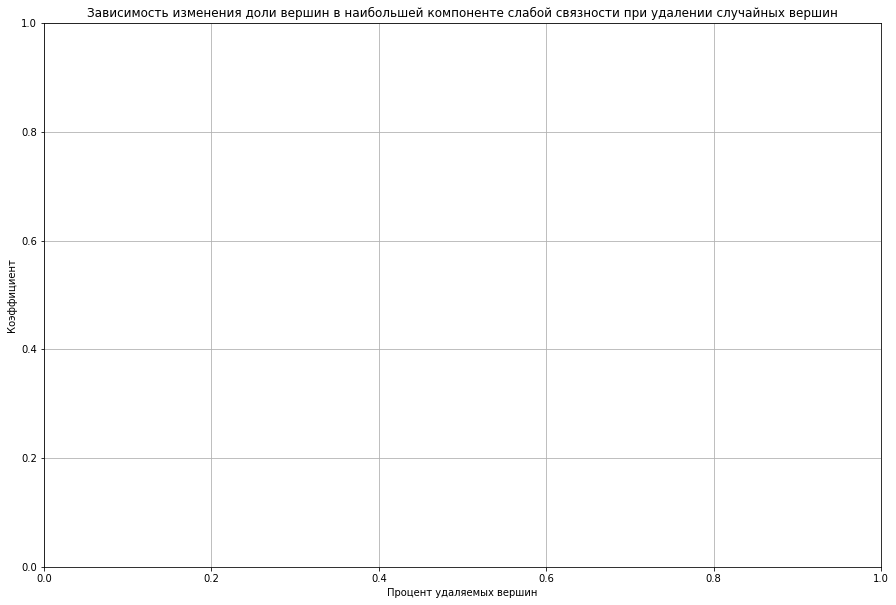

In [66]:
# node_numbers_to_delete = [2, 4, 8, 16, 32, 64, 78 ,128, 200 ,256, 315, 450, 512, 600, 712, 827, 901, 1024, 1500, 2048, 3000, 3500, 4096, 5000, 6000, 7000, 8182, 9000, 10000, 16364]

nodes_astro = set([*df_astro["u"].unique(), *df_astro["v"].unique()])
nodes_astro_len = len(nodes_astro)
node_proportions = []
for i in range(0,100, 10):
    number = round(nodes_astro_len*i*0.01)
    print(number)
    nodes_to_delete_astro = random.sample(list(nodes_astro), k=number)
    
    graph_edges_astro_after_delete = [edge for edge in df_astro.values if edge[0] not in nodes_to_delete_astro and edge[1] not in nodes_to_delete_astro]
    graph_components_astro_after_delete = find_components(graph_edges_astro_after_delete)
    new_max_component_astro = max(graph_components_astro_after_delete, key=lambda i: len(i))
    
    proportion = len(set(new_max_component_astro) - set(nodes_to_delete_astro))/(nodes_astro_len-number)
    node_proportions.append(proportion)

print(node_proportions)
plt.figure(figsize=(15, 10))
plt.title("Зависимость изменения доли вершин в наибольшей компоненте слабой связности при удалении случайных вершин")
plt.xlabel("Процент удаляемых вершин")
plt.ylabel("Коэффициент") 
plt.grid()
node_numbers_to_delete = [i for i in range(100)]
plt.plot(node_numbers_to_delete, node_proportions)

[0.9537076496910292, 0.9438887244746966, 0.9232920495405513, 0.8990867579908676, 0.8802272929059753, 0.8337950138504155, 0.800372885870289, 0.732421875, 0.630793819925413, 0.43953116675546083]


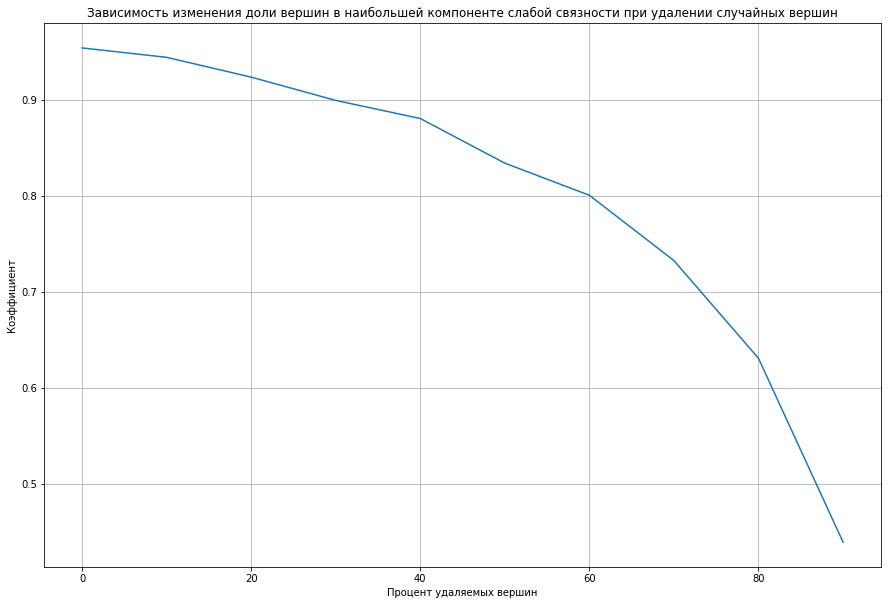

In [67]:
print(node_proportions)
plt.figure(figsize=(15, 10))
plt.title("Зависимость изменения доли вершин в наибольшей компоненте слабой связности при удалении случайных вершин")
plt.xlabel("Процент удаляемых вершин")
plt.ylabel("Коэффициент") 
plt.grid()
node_numbers_to_delete = [i for i in range(0,100, 10)]
plt.plot(node_numbers_to_delete, node_proportions)

0
len5105038
87571
len4141386
175143
len3261083
262714
len2495825
350285
len1828743
437856
len1276997
525428
len820375
612999
len460923
700570
len204497
788142
len50231
[0.9772630987549574, 0.9411768437667324, 0.9013988609275304, 0.8529230879658858, 0.7962327854625182, 0.7227999095595137, 0.637700729406055, 0.522427430589919, 0.3520209200481892, 0.08527937330851537]


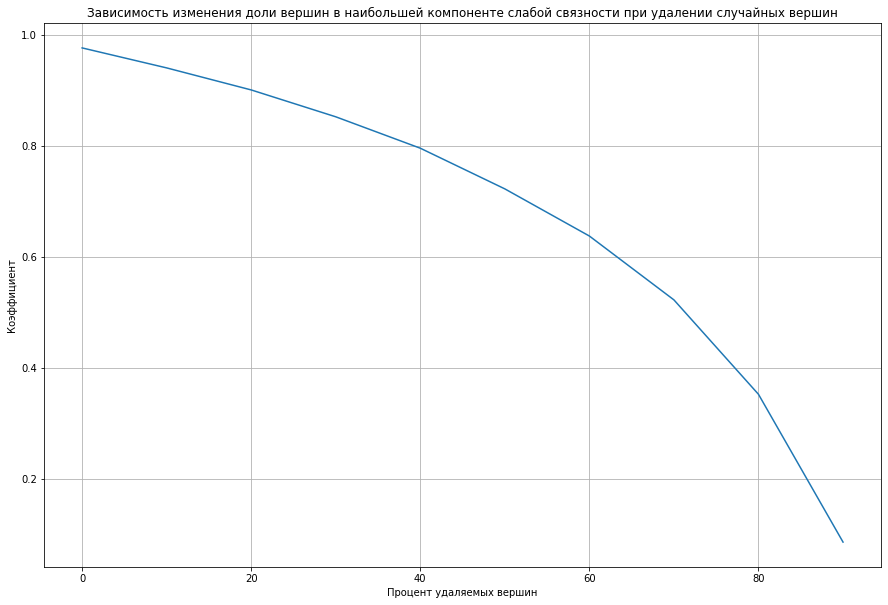

In [96]:
# node_numbers_to_delete = [2, 4, 8, 16, 32, 64, 78 ,128, 200 ,256, 315, 450, 512, 600, 712, 827, 901, 1024, 1500, 2048, 3000, 3500, 4096, 5000, 6000, 7000, 8182, 9000, 10000, 16364, 20000, 30000, 40000, 50000, 70000, 90000, 100000, 150000, 200000, 300000, 400000, 500000]
nodes_google = set([*df_google["u"].unique(), *df_google["v"].unique()])
nodes_google_len = len(nodes_google)
node_proportions_google = []


for i in range(0,100, 10):
    number = round(nodes_google_len*i*0.01)
    print(number)
    nodes_to_delete_google = random.sample(list(nodes_google), k=number)
    nodes_to_delete_google_df = pd.DataFrame(nodes_to_delete_google)
    df_google_after_delete = df_google[~df_google.u.isin(nodes_to_delete_google)]
    df_google_after_delete = df_google_after_delete[~df_google_after_delete.v.isin(nodes_to_delete_google)]
    graph_edges_google_after_delete = [edge for edge in df_google_after_delete.values]
    graph_edges_google_after_delete.pop(0)
    print(f'len{len(graph_edges_google_after_delete)}')

    graph_components_google_after_delete = find_components(graph_edges_google_after_delete)
    new_max_component_google = max(graph_components_google_after_delete, key=lambda i: len(i))
    
    proportion = len(set(new_max_component_google))/(nodes_google_len-number)
    node_proportions_google.append(proportion)

print(node_proportions_google)
plt.figure(figsize=(15, 10))
plt.title("Зависимость изменения доли вершин в наибольшей компоненте слабой связности при удалении случайных вершин")
plt.xlabel("Процент удаляемых вершин")
plt.ylabel("Коэффициент") 
plt.grid()
node_numbers_to_delete = [i for i in range(0,100,10)]
plt.plot(node_numbers_to_delete, node_proportions_google)

0
len17414509
321572
len14082410
643144
len11161861
964716
len8530022
1286288
len6295389
1607860
len4340728
1929432
len2782675
2251004
len1581489
2572576
len696982
2894148
len174176
[0.9833620464468299, 0.9583901721681131, 0.930769003520207, 0.8959793052344642, 0.8555181006638223, 0.8050862637294292, 0.7387396912666526, 0.6499809270293019, 0.5099433408381326, 0.2863930939260881]


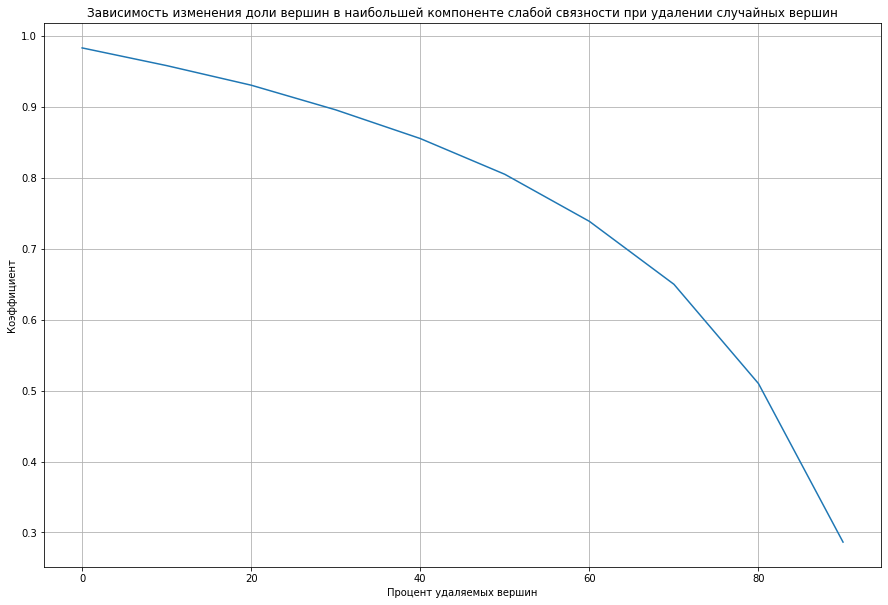

In [102]:
# node_numbers_to_delete = [2, 4, 8, 16, 32, 64, 78 ,128, 200 ,256, 315, 450, 512, 600, 712, 827, 901, 1024, 1500, 2048, 3000, 3500, 4096, 5000, 6000, 7000, 8182, 9000, 10000, 16364, 60000, 120000, 180000, 200000, 220000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000, 700000, 800000, 900000, 1000000, 1100000]
df_vk_u_v = pd.read_csv("vk_u_v.csv", delimiter=',')
nodes_vk = set([*df_vk_u_v["u"].unique(), *df_vk_u_v["v"].unique()])
nodes_vk_len = len(nodes_vk)
node_proportions_vk = []


for i in range(0,100, 10):
    number = round(nodes_vk_len*i*0.01)
    print(number)
    nodes_to_delete_vk = random.sample(list(nodes_vk), k=number)
    nodes_to_delete_vk_df = pd.DataFrame(nodes_to_delete_vk)
    df_vk_after_delete = df_vk_u_v[~df_vk_u_v.u.isin(nodes_to_delete_vk)]
    df_vk_after_delete = df_vk_after_delete[~df_vk_after_delete.v.isin(nodes_to_delete_vk)]
    graph_edges_vk_after_delete = [edge for edge in df_vk_after_delete[["u", "v"]].values]
    graph_edges_vk_after_delete.pop(0)
    print(f'len{len(graph_edges_vk_after_delete)}')

    graph_components_vk_after_delete = find_components(graph_edges_vk_after_delete)
    new_max_component_vk = max(graph_components_vk_after_delete, key=lambda i: len(i))
    
    proportion = len(set(new_max_component_vk))/(nodes_vk_len-number)
    node_proportions_vk.append(proportion)

print(node_proportions_vk)
plt.figure(figsize=(15, 10))
plt.title("Зависимость изменения доли вершин в наибольшей компоненте слабой связности при удалении случайных вершин")
plt.xlabel("Процент удаляемых вершин")
plt.ylabel("Коэффициент") 
plt.grid()
node_numbers_to_delete = [i for i in range(0,100,10)]
plt.plot(node_numbers_to_delete, node_proportions_vk)






# for number in node_numbers_to_delete:
#     nodes_to_delete_vk = random.sample(list(nodes_vk), k=number)
#     proportion = len(set(max_component_vk) - set(nodes_to_delete_vk))/nodes_vk_len
#     node_proportions.append(proportion)

# print(node_proportions)
# plt.figure(figsize=(15, 10))
# plt.title("Зависимость изменения доли вершин в наибольшей компоненте слабой связности при удалении случайных вершин")
# plt.xlabel("Кол-во удаляемых вершин")
# plt.ylabel("Коэффициент") 
# plt.grid()
# plt.plot(node_numbers_to_delete, node_proportions)

удаляется x% узлов наибольшей степени

In [126]:
node_number_to_delete = 3
max_n_nodes = heapq.nlargest(node_number_to_delete, graph_nodes_degrees_test.items(), key=lambda item: len(item[1]))
print(graph_nodes_degrees_test)
print(max_n_nodes)
max_n_nodes = [node[0] for node in max_n_nodes]
print(max_n_nodes)

max_component_test_after_delete = set(max_component_test) - set(max_n_nodes)
print()
print(max_component_test_after_delete)

{1: {2, 3, 4, 5}, 2: {1, 3}, 3: {1, 2}, 4: {1, 5}, 5: {1, 4, 6}, 6: {5, 7}, 7: {8, 6}, 8: {7}, 10: {11, 13}, 11: {10, 13}, 13: {10, 11}, 68: {19}, 19: {68}, 999: {9}, 9: {999}}
[(1, {2, 3, 4, 5}), (5, {1, 4, 6}), (2, {1, 3})]
[1, 5, 2]

{3, 4, 6, 7, 8}


0
df_astro: 396160
len396159
1877
df_astro: 396160
len147920
3754
df_astro: 396160
len80201
5632
df_astro: 396160
len44896
7509
df_astro: 396160
len24931
9386
df_astro: 396160
len13881
11263
df_astro: 396160
len7551
13140
df_astro: 396160
len4150
15018
df_astro: 396160
len2153
16895
df_astro: 396160
len923
[0.9537076496910292, 0.9068363421130512, 0.8199493940604607, 0.6267123287671232, 0.2281807688892835, 0.007564457702961858, 0.001997602876548142, 0.0012428977272727273, 0.0013319126265316996, 0.0015982951518380393]


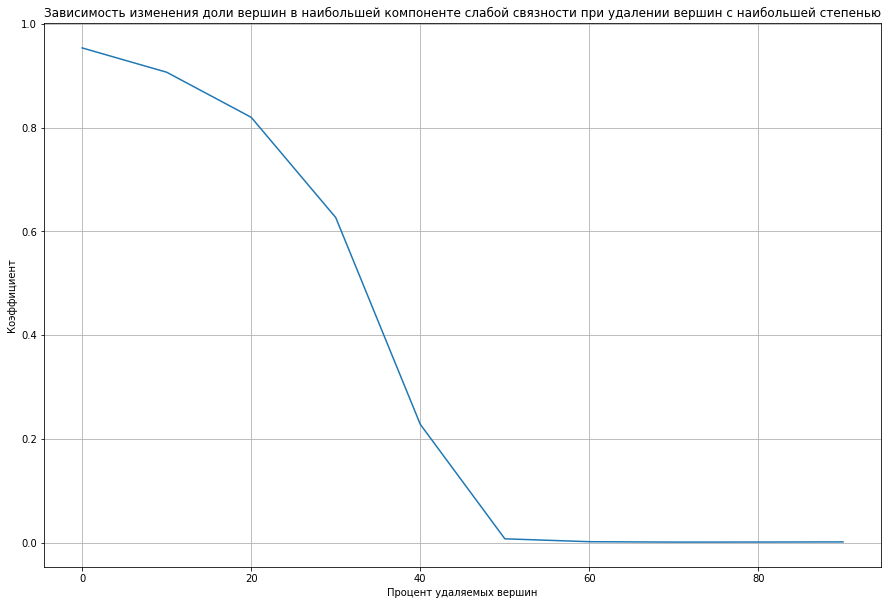

In [114]:
node_numbers_to_delete = [2, 4, 8, 16, 32, 64, 78 ,128, 200 ,256, 315, 450, 512, 600, 712, 827, 901, 1024, 1500, 2048, 3000, 3500, 4096, 5000, 6000, 7000, 8182, 9000, 10000, 16364]
# node_numbers_to_delete = [2, 4, 8, 16]
node_proportions_astro = []


for i in range(0,100, 10):
    number = round(nodes_astro_len*i*0.01)
    print(number)
    
    max_n_nodes_astro = heapq.nlargest(number, graph_nodes_degrees_astro.items(), key=lambda item: len(item[1]))
    max_n_nodes_astro = [node[0] for node in max_n_nodes_astro]
    
    print(f'df_astro: {len(df_astro)}')
    
    df_astro_after_delete = df_astro[~df_astro.u.isin(max_n_nodes_astro)]
    
    
    
    df_astro_after_delete = df_astro_after_delete[~df_astro_after_delete.v.isin(max_n_nodes_astro)]
    graph_edges_astro_after_delete = [edge for edge in df_astro_after_delete[["u", "v"]].values]
    graph_edges_astro_after_delete.pop(0)
    print(f'len{len(graph_edges_astro_after_delete)}')

    graph_components_astro_after_delete = find_components(graph_edges_astro_after_delete)
    new_max_component_astro = max(graph_components_astro_after_delete, key=lambda i: len(i))
    
    proportion = len(set(new_max_component_astro))/(nodes_astro_len-number)
    node_proportions_astro.append(proportion)

print(node_proportions_astro)
plt.figure(figsize=(15, 10))
plt.title("Зависимость изменения доли вершин в наибольшей компоненте слабой связности при удалении вершин с наибольшей степенью")
plt.xlabel("Процент удаляемых вершин")
plt.ylabel("Коэффициент") 
plt.grid()
node_numbers_to_delete = [i for i in range(0,100, 10)]
plt.plot(node_numbers_to_delete, node_proportions_astro)

0
df_google: 5105039
len5105038
87571
df_google: 5105039
len1521227
175143
df_google: 5105039
len761064
262714
df_google: 5105039
len406013
350285
df_google: 5105039
len221882
437856
df_google: 5105039
len104878
525428
df_google: 5105039
len43131
612999
df_google: 5105039
len13755
700570
df_google: 5105039
len4213
788142
df_google: 5105039
len625
[0.9772630987549574, 0.6502305422119364, 0.32231468661233, 0.04427250289152185, 0.00042441590474812915, 9.13540265429124e-05, 4.567709151119802e-05, 4.948346871502851e-05, 5.138658125074939e-05, 2.2838610955681676e-05]


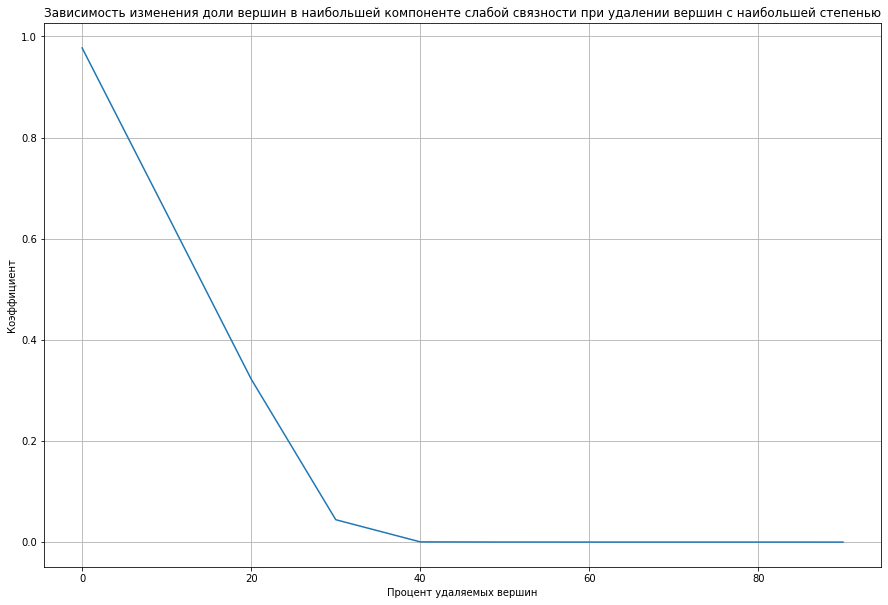

In [116]:
node_numbers_to_delete = [2, 4, 8, 16, 32, 64, 78 ,128, 200 ,256, 315, 450, 512, 600, 712, 827, 901, 1024, 1500, 2048, 3000, 3500, 4096, 5000, 6000, 7000, 8182, 9000, 10000, 16364]
# node_numbers_to_delete = [2, 4, 8, 16]
node_proportions_google = []


for i in range(0,100, 10):
    number = round(nodes_google_len*i*0.01)
    print(number)
    
    max_n_nodes_google = heapq.nlargest(number, graph_nodes_degrees_google.items(), key=lambda item: len(item[1]))
    max_n_nodes_google = [node[0] for node in max_n_nodes_google]
    
    print(f'df_google: {len(df_google)}')
    
    df_google_after_delete = df_google[~df_google.u.isin(max_n_nodes_google)]
    
    
    
    df_google_after_delete = df_google_after_delete[~df_google_after_delete.v.isin(max_n_nodes_google)]
    graph_edges_google_after_delete = [edge for edge in df_google_after_delete[["u", "v"]].values]
    graph_edges_google_after_delete.pop(0)
    print(f'len{len(graph_edges_google_after_delete)}')

    graph_components_google_after_delete = find_components(graph_edges_google_after_delete)
    new_max_component_google = max(graph_components_google_after_delete, key=lambda i: len(i))
    
    proportion = len(set(new_max_component_google))/(nodes_google_len-number)
    node_proportions_google.append(proportion)

print(node_proportions_google)
plt.figure(figsize=(15, 10))
plt.title("Зависимость изменения доли вершин в наибольшей компоненте слабой связности при удалении вершин с наибольшей степенью")
plt.xlabel("Процент удаляемых вершин")
plt.ylabel("Коэффициент") 
plt.grid()
node_numbers_to_delete = [i for i in range(0,100, 10)]
plt.plot(node_numbers_to_delete, node_proportions_google)



# node_numbers_to_delete = [2, 4, 8, 16, 32, 64, 78 ,128, 200 ,256, 315, 450, 512, 600, 712, 827, 901, 1024, 1500, 2048, 3000, 3500, 4096, 5000, 6000, 7000, 8182, 9000, 10000, 16364, 60000, 120000, 180000, 200000, 220000, 250000, 300000, 350000]
# # node_numbers_to_delete = [2, 4, 8, 16]

# nodes_vk = set([*df["u"].unique(), *df["v"].unique()])
# nodes_vk_len = len(nodes_vk)

# max_n_nodes_in_graph = heapq.nlargest(nodes_vk_len, graph_nodes_degrees_vk.items(), key=lambda item: len(item[1]))

# node_proportions = []
# for number in node_numbers_to_delete:
#     max_n_nodes = [node[0] for node in max_n_nodes_in_graph[:number]]
#     proportion = len(set(max_component_vk) - set(max_n_nodes))/nodes_vk_len
#     node_proportions.append(proportion)

# print(node_proportions)
# plt.figure(figsize=(15, 10))
# plt.title("Зависимость изменения доли вершин в наибольшей компоненте слабой связности при удалении вершин с наибольшей степенью")
# plt.xlabel("Кол-во удаляемых вершин")
# plt.ylabel("Коэффициент") 
# plt.grid()
# plt.plot(node_numbers_to_delete, node_proportions)

0
df_vk: 17414510
len17414509
321572
df_vk: 17414510
len4418957
643144
df_vk: 17414510
len2225087
964716
df_vk: 17414510
len1165472
1286288
df_vk: 17414510
len602190
1607860
df_vk: 17414510
len300370
1929432
df_vk: 17414510
len140471
2251004
df_vk: 17414510
len59733
2572576
df_vk: 17414510
len19928
2894148
df_vk: 17414510
len10038
[0.9833620464468299, 0.8177778054197643, 0.6341834021618797, 0.23408710068929242, 3.368867107003512e-05, 1.4304728023584144e-05, 7.774308708469643e-06, 6.219446966775714e-06, 3.109723483387857e-06, 6.219446966775714e-06]


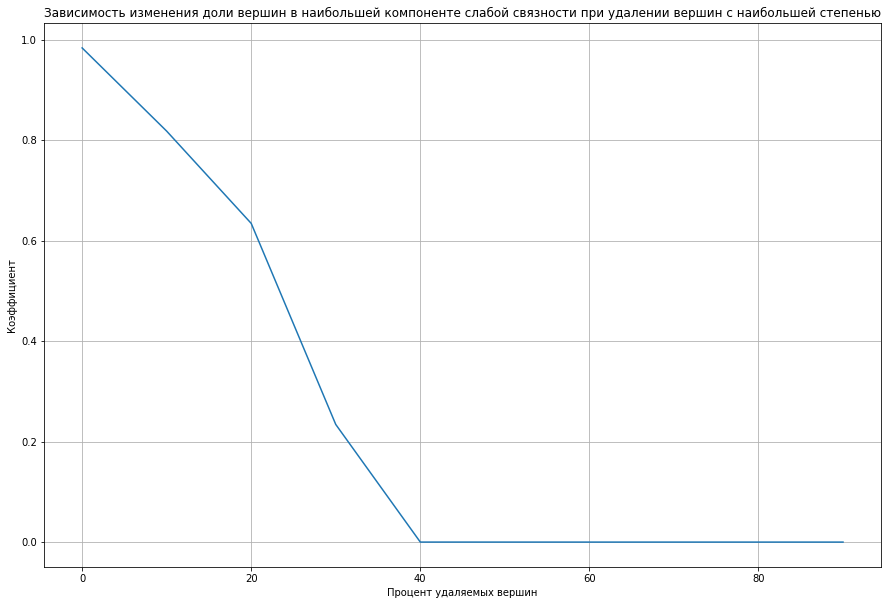

In [121]:
node_proportions_vk = []

# df_vk_u_v = pd.read_csv("vk_u_v.csv", delimiter=',')
# nodes_vk = set([*df_vk_u_v["u"].unique(), *df_vk_u_v["v"].unique()])
# nodes_vk_len = len(nodes_vk)
# node_proportions_vk = []

for i in range(0,100, 10):
    number = round(nodes_vk_len*i*0.01)
    print(number)
    
    max_n_nodes_vk = heapq.nlargest(number, graph_nodes_degrees_vk.items(), key=lambda item: len(item[1]))
    max_n_nodes_vk = [node[0] for node in max_n_nodes_vk]
    
    print(f'df_vk: {len(df_vk_u_v)}')
    
    df_vk_after_delete = df_vk_u_v[~df_vk_u_v.u.isin(max_n_nodes_vk)]
    df_vk_after_delete = df_vk_after_delete[~df_vk_after_delete.v.isin(max_n_nodes_vk)]
    graph_edges_vk_after_delete = [edge for edge in df_vk_after_delete[["u", "v"]].values]
    graph_edges_vk_after_delete.pop(0)
    print(f'len{len(graph_edges_vk_after_delete)}')

    graph_components_vk_after_delete = find_components(graph_edges_vk_after_delete)
    new_max_component_vk = max(graph_components_vk_after_delete, key=lambda i: len(i))
    
    proportion = len(set(new_max_component_vk))/(nodes_vk_len-number)
    node_proportions_vk.append(proportion)

print(node_proportions_vk)
plt.figure(figsize=(15, 10))
plt.title("Зависимость изменения доли вершин в наибольшей компоненте слабой связности при удалении вершин с наибольшей степенью")
plt.xlabel("Процент удаляемых вершин")
plt.ylabel("Коэффициент") 
plt.grid()
node_numbers_to_delete = [i for i in range(0,100, 10)]
plt.plot(node_numbers_to_delete, node_proportions_vk)
